DATA 1

In [61]:
#importing the libraries that will be used further in the code

import pandas as pd
from sklearn.metrics.cluster import fowlkes_mallows_score
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#mounting google drive since all the datasets are uploaded on the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
#reading the datasets from drive
datasets=[]
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/FDAProject1_Dataset/Data' + str(i)+ '.csv')
  datasets.append(df)

In [63]:
#printing the required dataset (dataset_1 in this case)
df_1=datasets[0]
df_1

Unnamed: 0        X1        X2        X3  Class
0             1 -0.063274  0.027734  0.022683      1
1             2 -0.000731  0.048211  0.069198      1
2             3 -0.060767 -0.009080  0.053085      1
3             4  0.013252 -0.011876  0.055324      1
4             5 -0.054508 -0.003813  0.001738      1
..          ...       ...       ...       ...    ...
207         208  0.175738 -0.053478 -2.733752      7
208         209  0.396046 -0.858377 -3.126866      7
209         210 -0.406362 -0.334541 -2.885598      7
210         211 -0.299275  0.071281 -3.642585      7
211         212 -0.506192  0.433538 -2.608597      7

[212 rows x 5 columns]

In [64]:
#printing the original clusters class as given in the dataset
original_labels=df_1.iloc[:,-1].values
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [65]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_1[['Class']].nunique())
number_of_clusters

7

In [66]:
#removing the unnamed colomn from the dataset
df1=df_1.iloc[:,1:]
df1

X1        X2        X3  Class
0   -0.063274  0.027734  0.022683      1
1   -0.000731  0.048211  0.069198      1
2   -0.060767 -0.009080  0.053085      1
3    0.013252 -0.011876  0.055324      1
4   -0.054508 -0.003813  0.001738      1
..        ...       ...       ...    ...
207  0.175738 -0.053478 -2.733752      7
208  0.396046 -0.858377 -3.126866      7
209 -0.406362 -0.334541 -2.885598      7
210 -0.299275  0.071281 -3.642585      7
211 -0.506192  0.433538 -2.608597      7

[212 rows x 4 columns]

In [67]:
#renaming the coloumns if required and removing the class coloumn
if len(df1.columns)==4:
    df1= df1.rename(columns={df1.columns[0]: 'X1', df1.columns[1]: 'X2',df1.columns[2]:'X3'})
    df_kmeans=df1.iloc[:,0:3]
else:
  df1=df1.rename(columns={df1.columns[0]: 'X1', df1.columns[1]: 'X2'})
  df_kmeans=df1.iloc[:,0:2]
df_kmeans

X1        X2        X3
0   -0.063274  0.027734  0.022683
1   -0.000731  0.048211  0.069198
2   -0.060767 -0.009080  0.053085
3    0.013252 -0.011876  0.055324
4   -0.054508 -0.003813  0.001738
..        ...       ...       ...
207  0.175738 -0.053478 -2.733752
208  0.396046 -0.858377 -3.126866
209 -0.406362 -0.334541 -2.885598
210 -0.299275  0.071281 -3.642585
211 -0.506192  0.433538 -2.608597

[212 rows x 3 columns]

In [68]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)


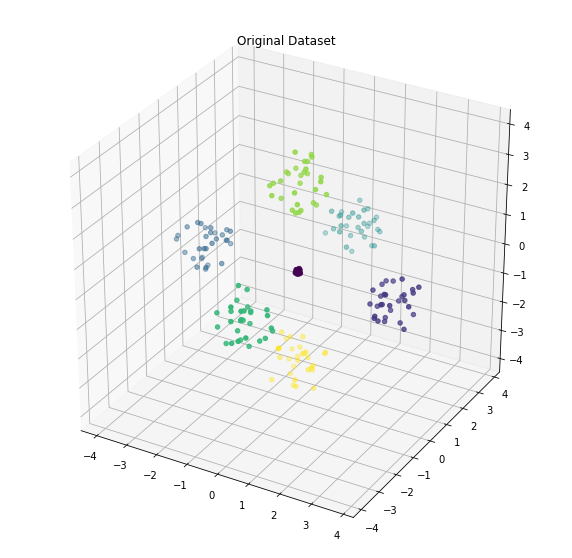

In [69]:
# Plotting the original Dataframe.

plot_df(df1,"Original Dataset")

In [70]:
# K-Means Clustering.

mdl_data1=KMeans(n_clusters=number_of_clusters)
mdl_data1.fit(df_kmeans)
predicted_labels=mdl_data1.labels_ +1
df_predicted=df1
df_predicted["Class"]=predicted_labels
print('SSE_MDL1: '+ str(mdl_data1.inertia_))

SSE_MDL1: 106.14764659310868


In [71]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [72]:
#printing the post K-means clustering dataframe
df_predicted

X1        X2        X3  Class
0   -0.063274  0.027734  0.022683      1
1   -0.000731  0.048211  0.069198      1
2   -0.060767 -0.009080  0.053085      1
3    0.013252 -0.011876  0.055324      1
4   -0.054508 -0.003813  0.001738      1
..        ...       ...       ...    ...
207  0.175738 -0.053478 -2.733752      5
208  0.396046 -0.858377 -3.126866      5
209 -0.406362 -0.334541 -2.885598      5
210 -0.299275  0.071281 -3.642585      5
211 -0.506192  0.433538 -2.608597      5

[212 rows x 4 columns]

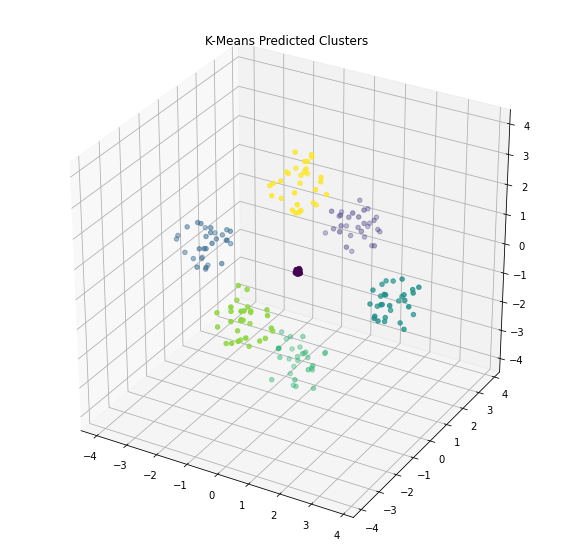

In [73]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [74]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0, 30],
       [ 0,  0,  0,  0, 30,  0,  0]])

In [75]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.29245283018867924

In [76]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.29245283018867924

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [77]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [78]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [79]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2        X3  Class
0   -0.063274  0.027734  0.022683      7
1   -0.000731  0.048211  0.069198      7
2   -0.060767 -0.009080  0.053085      7
3    0.013252 -0.011876  0.055324      7
4   -0.054508 -0.003813  0.001738      7
..        ...       ...       ...    ...
207  0.175738 -0.053478 -2.733752      4
208  0.396046 -0.858377 -3.126866      4
209 -0.406362 -0.334541 -2.885598      4
210 -0.299275  0.071281 -3.642585      4
211 -0.506192  0.433538 -2.608597      4

[212 rows x 4 columns]

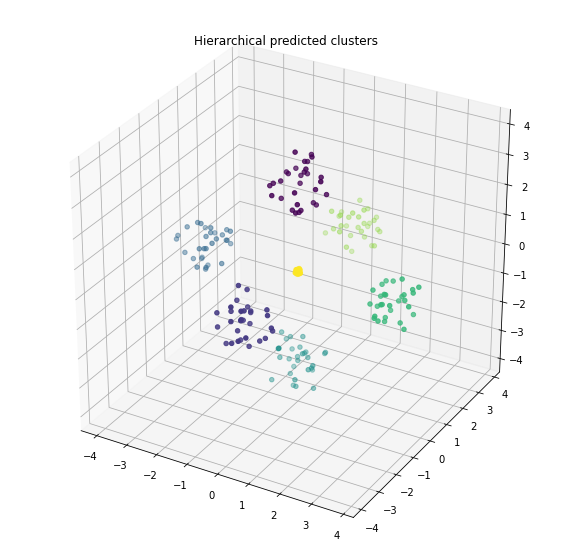

In [80]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

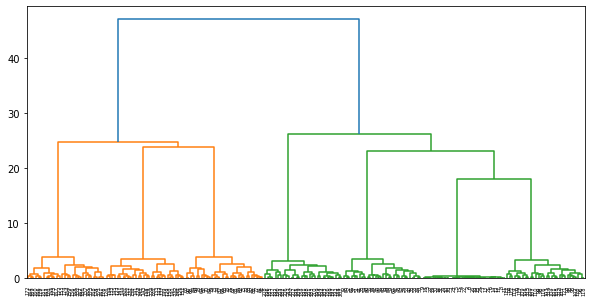

In [81]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [82]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[ 0,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0,  0, 30,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0]])

In [83]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.14150943396226415

In [84]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.14150943396226415

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 2

In [85]:
#printing the required dataset (dataset_2 in this case)
df_2=datasets[1]
df_2

Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      1
1           X2  0.387577  0.176780  0.888046      1
2           X3  0.268546  0.582963  0.080981      1
3           X4  2.031145  0.244597  0.643921      1
4           X5  0.188677  0.461280  0.496633      1
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      3
400          X  4.100000  5.100000  0.504558      4
401        X.1  3.900000  4.900000  0.941634      4
402        X.2  4.000000  5.000000  0.702123      4
403        X.3  4.100000  5.100000  0.887645      4

[404 rows x 5 columns]

In [86]:
#printing the original clusters class as given in the dataset
original_labels=df_2.iloc[:,-1].values
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [87]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_2[['Class']].nunique())
number_of_clusters

4

In [88]:
#removing the unnamed colomn from the dataset
df2=df_2.iloc[:,1:]
df2

X         Y         C  Class
0    3.277701  0.814082  0.326574      1
1    0.387577  0.176780  0.888046      1
2    0.268546  0.582963  0.080981      1
3    2.031145  0.244597  0.643921      1
4    0.188677  0.461280  0.496633      1
..        ...       ...       ...    ...
399  3.248655  2.297291  3.388138      3
400  4.100000  5.100000  0.504558      4
401  3.900000  4.900000  0.941634      4
402  4.000000  5.000000  0.702123      4
403  4.100000  5.100000  0.887645      4

[404 rows x 4 columns]

In [89]:
#renaming the coloumns if required and removing the class coloumn
if len(df2.columns)==4:
    df2= df2.rename(columns={df2.columns[0]: 'X1', df2.columns[1]: 'X2',df2.columns[2]:'X3'})
    df_kmeans=df2.iloc[:,0:3]
else:
  df2=df2.rename(columns={df2.columns[0]: 'X1', df2.columns[1]: 'X2'})
  df_kmeans=df2.iloc[:,0:2]
df_kmeans

X1        X2        X3
0    3.277701  0.814082  0.326574
1    0.387577  0.176780  0.888046
2    0.268546  0.582963  0.080981
3    2.031145  0.244597  0.643921
4    0.188677  0.461280  0.496633
..        ...       ...       ...
399  3.248655  2.297291  3.388138
400  4.100000  5.100000  0.504558
401  3.900000  4.900000  0.941634
402  4.000000  5.000000  0.702123
403  4.100000  5.100000  0.887645

[404 rows x 3 columns]

In [90]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)


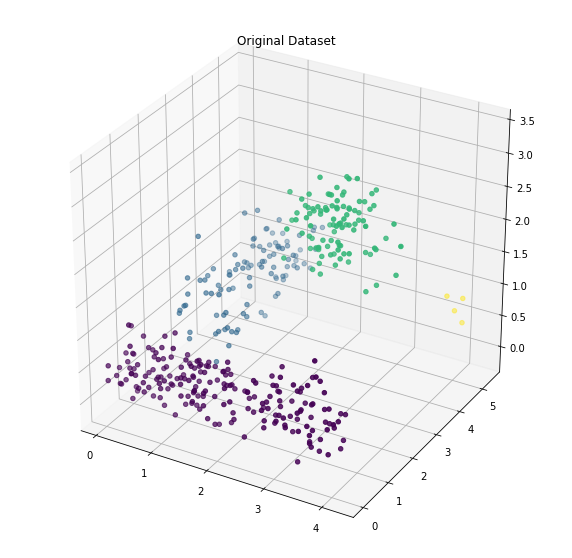

In [91]:
# Plotting the original Dataframe.

plot_df(df2,"Original Dataset")

In [92]:
# K-Means Clustering.

mdl_data2=KMeans(n_clusters=number_of_clusters)
mdl_data2.fit(df_kmeans)
predicted_labels=mdl_data2.labels_ +1
df_predicted=df2
df_predicted["Class"]=predicted_labels
print('SSE_MDL2: '+ str(mdl_data2.inertia_))

SSE_MDL2: 280.1321159627272


In [93]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1,
       4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4,
       1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1,
       4, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3,
       3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 2,

In [94]:
#printing the post K-means clustering dataframe
df_predicted

X1        X2        X3  Class
0    3.277701  0.814082  0.326574      4
1    0.387577  0.176780  0.888046      1
2    0.268546  0.582963  0.080981      1
3    2.031145  0.244597  0.643921      4
4    0.188677  0.461280  0.496633      1
..        ...       ...       ...    ...
399  3.248655  2.297291  3.388138      2
400  4.100000  5.100000  0.504558      3
401  3.900000  4.900000  0.941634      3
402  4.000000  5.000000  0.702123      3
403  4.100000  5.100000  0.887645      3

[404 rows x 4 columns]

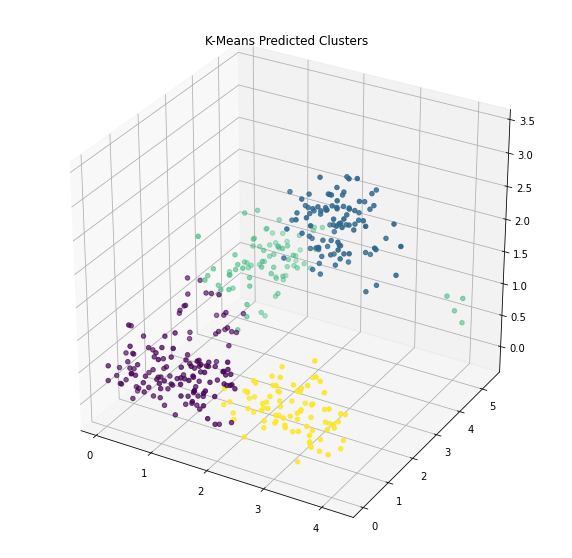

In [95]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [96]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[117,   0,   0,  83],
       [ 24,   0,  76,   0],
       [  0, 100,   0,   0],
       [  0,   0,   4,   0]])

In [97]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.2896039603960396

In [98]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.33971139049388804

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [99]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [100]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [101]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2        X3  Class
0    3.277701  0.814082  0.326574      4
1    0.387577  0.176780  0.888046      2
2    0.268546  0.582963  0.080981      2
3    2.031145  0.244597  0.643921      2
4    0.188677  0.461280  0.496633      2
..        ...       ...       ...    ...
399  3.248655  2.297291  3.388138      3
400  4.100000  5.100000  0.504558      1
401  3.900000  4.900000  0.941634      1
402  4.000000  5.000000  0.702123      1
403  4.100000  5.100000  0.887645      1

[404 rows x 4 columns]

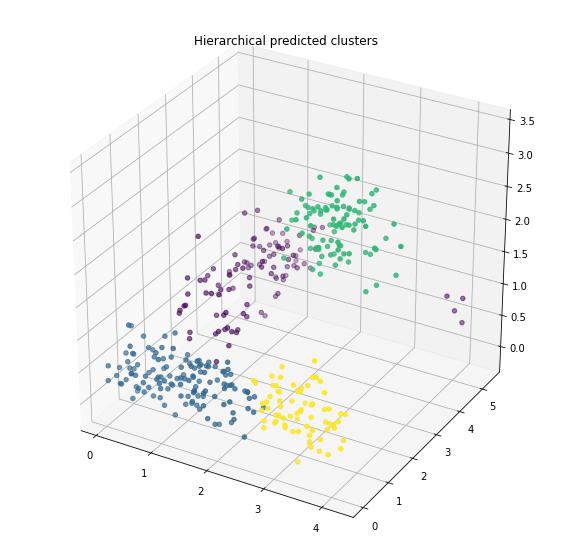

In [102]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

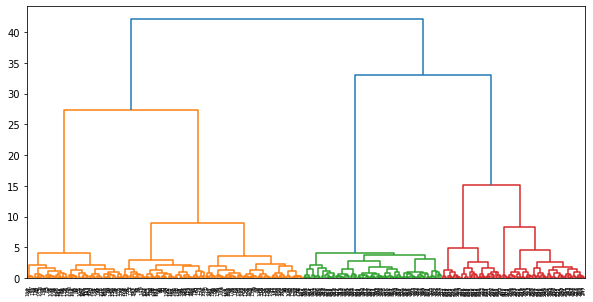

In [103]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [104]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[  0, 131,   0,  69],
       [100,   0,   0,   0],
       [  0,   0, 100,   0],
       [  4,   0,   0,   0]])

In [105]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.24752475247524752

In [106]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.24752475247524752

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 3

In [107]:
#printing the required dataset (dataset_3 in this case)
df_3=datasets[2]
df_3

Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      1
1             2  1.409178 -0.035191 -0.251980      1
2             3  1.096803  0.246365 -0.415011      1
3             4  1.463328  0.265354 -0.513488      1
4             5  1.603284  0.080577 -0.470257      1
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      4
396         397  0.653127 -0.703156  1.549448      4
397         398 -0.726249 -0.103244  0.694300      4
398         399  0.808596 -0.492640  1.649370      4
399         400  0.749291 -0.447840  0.863555      4

[400 rows x 5 columns]

In [108]:
#printing the original clusters class as given in the dataset
original_labels=df_3.iloc[:,-1].values
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [109]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_3[['Class']].nunique())
number_of_clusters

4

In [110]:
#removing the unnamed colomn from the dataset
df3=df_3.iloc[:,1:]
df3

X1        X2        X3  Class
0    1.295428  0.050829 -0.385217      1
1    1.409178 -0.035191 -0.251980      1
2    1.096803  0.246365 -0.415011      1
3    1.463328  0.265354 -0.513488      1
4    1.603284  0.080577 -0.470257      1
..        ...       ...       ...    ...
395  0.795695  0.209456  1.880609      4
396  0.653127 -0.703156  1.549448      4
397 -0.726249 -0.103244  0.694300      4
398  0.808596 -0.492640  1.649370      4
399  0.749291 -0.447840  0.863555      4

[400 rows x 4 columns]

In [111]:
#renaming the coloumns if required and removing the class coloumn
if len(df3.columns)==4:
    df3= df3.rename(columns={df3.columns[0]: 'X1', df3.columns[1]: 'X2',df3.columns[2]:'X3'})
    df_kmeans=df3.iloc[:,0:3]
else:
  df3=df3.rename(columns={df3.columns[0]: 'X1', df3.columns[1]: 'X2'})
  df_kmeans=df3.iloc[:,0:2]
df_kmeans

X1        X2        X3
0    1.295428  0.050829 -0.385217
1    1.409178 -0.035191 -0.251980
2    1.096803  0.246365 -0.415011
3    1.463328  0.265354 -0.513488
4    1.603284  0.080577 -0.470257
..        ...       ...       ...
395  0.795695  0.209456  1.880609
396  0.653127 -0.703156  1.549448
397 -0.726249 -0.103244  0.694300
398  0.808596 -0.492640  1.649370
399  0.749291 -0.447840  0.863555

[400 rows x 3 columns]

In [112]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)


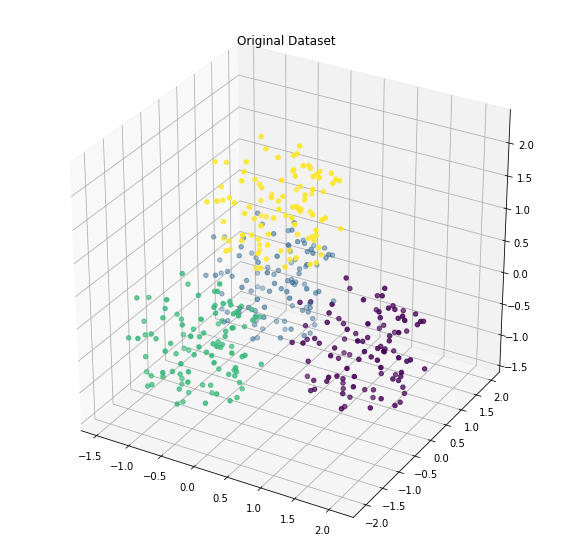

In [113]:
# Plotting the original Dataframe.

plot_df(df3,"Original Dataset")

In [114]:
# K-Means Clustering.

mdl_data3=KMeans(n_clusters=number_of_clusters)
mdl_data3.fit(df_kmeans)
predicted_labels=mdl_data3.labels_ +1
df_predicted=df3
df_predicted["Class"]=predicted_labels
print('SSE_MDL3: '+ str(mdl_data3.inertia_))

SSE_MDL3: 229.0487999751335


In [115]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,

In [116]:
#printing the post K-means clustering dataframe
df_predicted

X1        X2        X3  Class
0    1.295428  0.050829 -0.385217      1
1    1.409178 -0.035191 -0.251980      1
2    1.096803  0.246365 -0.415011      1
3    1.463328  0.265354 -0.513488      1
4    1.603284  0.080577 -0.470257      1
..        ...       ...       ...    ...
395  0.795695  0.209456  1.880609      4
396  0.653127 -0.703156  1.549448      4
397 -0.726249 -0.103244  0.694300      4
398  0.808596 -0.492640  1.649370      4
399  0.749291 -0.447840  0.863555      4

[400 rows x 4 columns]

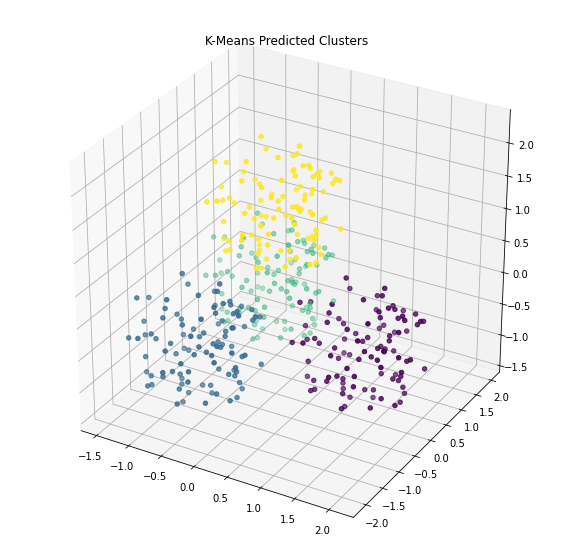

In [117]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [118]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[100,   0,   0,   0],
       [  0,   0, 100,   0],
       [  0, 100,   0,   0],
       [  0,   0,   0, 100]])

In [119]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.5

In [120]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.5

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [121]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [122]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [124]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2        X3  Class
0    1.295428  0.050829 -0.385217      2
1    1.409178 -0.035191 -0.251980      2
2    1.096803  0.246365 -0.415011      2
3    1.463328  0.265354 -0.513488      2
4    1.603284  0.080577 -0.470257      2
..        ...       ...       ...    ...
395  0.795695  0.209456  1.880609      3
396  0.653127 -0.703156  1.549448      3
397 -0.726249 -0.103244  0.694300      3
398  0.808596 -0.492640  1.649370      3
399  0.749291 -0.447840  0.863555      3

[400 rows x 4 columns]

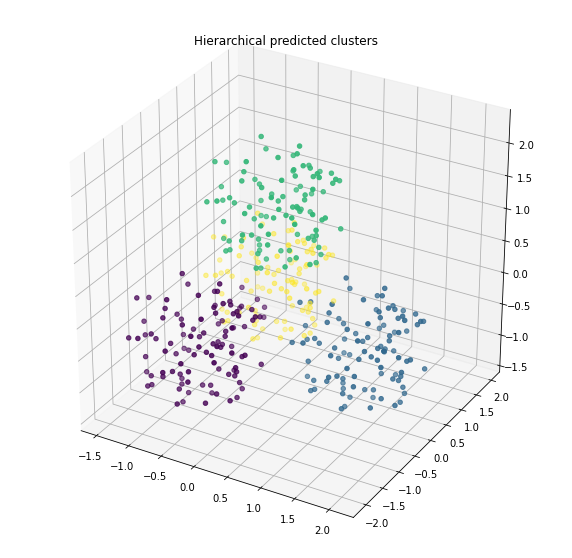

In [125]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

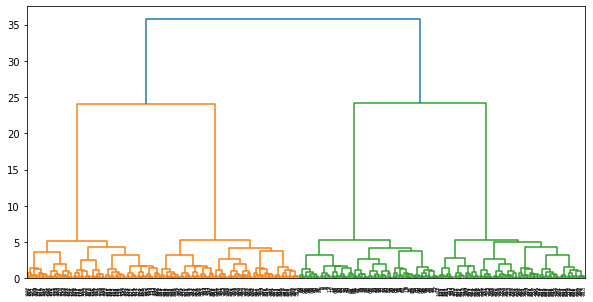

In [126]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [127]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[  0, 100,   0,   0],
       [  5,   0,   0,  95],
       [100,   0,   0,   0],
       [  0,   0, 100,   0]])

In [128]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.0

In [129]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.0

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 4

In [130]:
#printing the required dataset (dataset_4 in this case)
df_4=datasets[3]
df_4

Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]

In [131]:
#printing the original clusters class as given in the dataset
original_labels=df_4.iloc[:,-1].values
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [132]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_4[['Class']].nunique())
number_of_clusters

2

In [133]:
#removing the unnamed colomn from the dataset
df4=df_4.iloc[:,1:]
df4

X1      X2       X3  Class
0   -0.45300 -0.8910  0.02300      1
1    0.65300 -0.8460  0.02110      1
2    0.39800  0.9130 -0.00139      1
3    0.09520  1.0500  0.00628      1
4    0.52400 -0.9410  0.03780      1
..       ...     ...      ...    ...
995  0.01520  0.0531 -0.36100      2
996  0.05160  0.6910  0.87500      2
997 -0.00511  1.3900 -0.94700      2
998 -0.06710  0.7140  0.88100      2
999 -0.05770  0.4280 -0.73000      2

[1000 rows x 4 columns]

In [134]:
#renaming the coloumns if required and removing the class coloumn
if len(df4.columns)==4:
    df4= df4.rename(columns={df4.columns[0]: 'X1', df4.columns[1]: 'X2',df4.columns[2]:'X3'})
    df_kmeans=df4.iloc[:,0:3]
else:
  df4=df4.rename(columns={df4.columns[0]: 'X1', df4.columns[1]: 'X2'})
  df_kmeans=df4.iloc[:,0:2]
df_kmeans

X1      X2       X3
0   -0.45300 -0.8910  0.02300
1    0.65300 -0.8460  0.02110
2    0.39800  0.9130 -0.00139
3    0.09520  1.0500  0.00628
4    0.52400 -0.9410  0.03780
..       ...     ...      ...
995  0.01520  0.0531 -0.36100
996  0.05160  0.6910  0.87500
997 -0.00511  1.3900 -0.94700
998 -0.06710  0.7140  0.88100
999 -0.05770  0.4280 -0.73000

[1000 rows x 3 columns]

In [135]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)


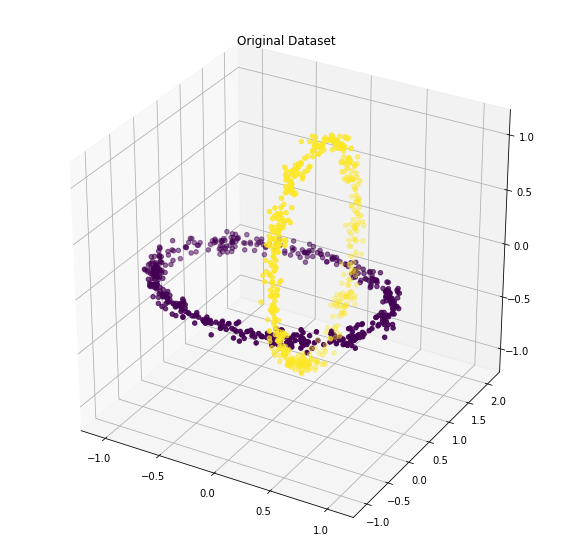

In [136]:
# Plotting the original Dataframe.

plot_df(df4,"Original Dataset")

In [137]:
# K-Means Clustering.

mdl_data4=KMeans(n_clusters=number_of_clusters)
mdl_data4.fit(df_kmeans)
predicted_labels=mdl_data4.labels_ +1
df_predicted=df4
df_predicted["Class"]=predicted_labels
print('SSE_MDL4: '+ str(mdl_data4.inertia_))

SSE_MDL4: 719.3443269685367


In [138]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,

In [139]:
#printing the post K-means clustering dataframe
df_predicted

X1      X2       X3  Class
0   -0.45300 -0.8910  0.02300      1
1    0.65300 -0.8460  0.02110      1
2    0.39800  0.9130 -0.00139      2
3    0.09520  1.0500  0.00628      2
4    0.52400 -0.9410  0.03780      1
..       ...     ...      ...    ...
995  0.01520  0.0531 -0.36100      1
996  0.05160  0.6910  0.87500      2
997 -0.00511  1.3900 -0.94700      2
998 -0.06710  0.7140  0.88100      2
999 -0.05770  0.4280 -0.73000      2

[1000 rows x 4 columns]

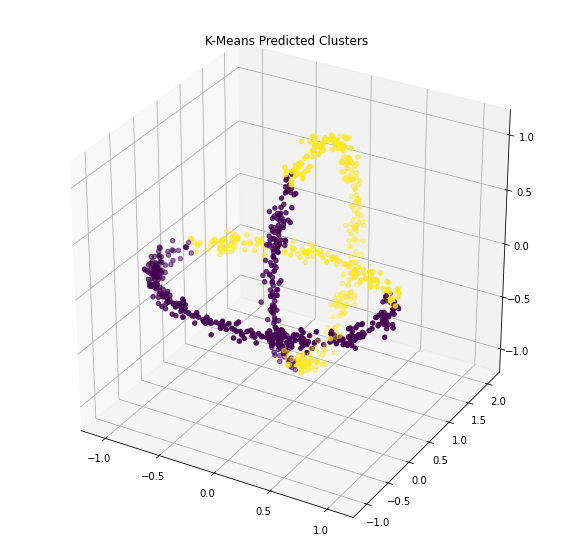

In [140]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [141]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[327, 173],
       [174, 326]])

In [142]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.653

In [143]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.6529996529996529

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [144]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [145]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,

In [146]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1      X2       X3  Class
0   -0.45300 -0.8910  0.02300      2
1    0.65300 -0.8460  0.02110      2
2    0.39800  0.9130 -0.00139      1
3    0.09520  1.0500  0.00628      1
4    0.52400 -0.9410  0.03780      2
..       ...     ...      ...    ...
995  0.01520  0.0531 -0.36100      1
996  0.05160  0.6910  0.87500      1
997 -0.00511  1.3900 -0.94700      1
998 -0.06710  0.7140  0.88100      1
999 -0.05770  0.4280 -0.73000      1

[1000 rows x 4 columns]

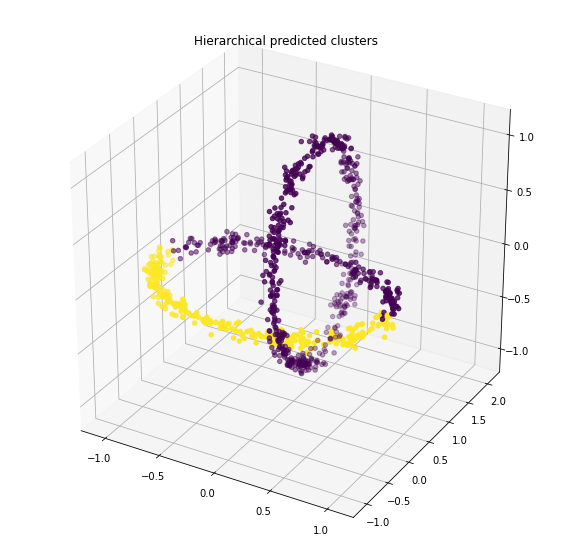

In [147]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

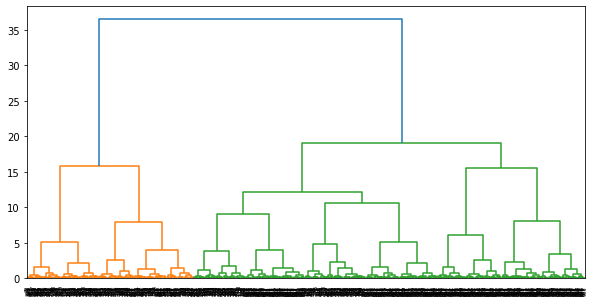

In [148]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [149]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[201, 299],
       [500,   0]])

In [150]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.201

In [151]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.16736053288925895

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 5

In [152]:
#printing the required dataset (dataset_5 in this case)
df_5=datasets[4]
df_5

Unnamed: 0         X1         X2         X3  Class
0             1  -4.822490 -50.402170   4.020861      1
1             2 -44.460120  20.964670 -11.492060      1
2             3  50.001020   0.780748   9.134460      1
3             4 -41.699080 -22.310060  16.314120      1
4             5   4.425242  -4.666664  50.223740      1
..          ...        ...        ...        ...    ...
795         796  -1.531027   0.681636   0.543271      2
796         797   0.500754  -1.848209   0.605654      2
797         798   1.089574  -0.246493  -3.355758      2
798         799  -1.907717   4.964502   2.098423      2
799         800   3.415463   4.529521  -1.617736      2

[800 rows x 5 columns]

In [153]:
#printing the original clusters class as given in the dataset
original_labels=df_5.iloc[:,-1].values
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [154]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_5[['Class']].nunique())
number_of_clusters

2

In [155]:
#removing the unnamed colomn from the dataset
df5=df_5.iloc[:,1:]
df5

X1         X2         X3  Class
0    -4.822490 -50.402170   4.020861      1
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      1
4     4.425242  -4.666664  50.223740      1
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      2
796   0.500754  -1.848209   0.605654      2
797   1.089574  -0.246493  -3.355758      2
798  -1.907717   4.964502   2.098423      2
799   3.415463   4.529521  -1.617736      2

[800 rows x 4 columns]

In [156]:
#renaming the coloumns if required and removing the class coloumn
if len(df5.columns)==4:
    df5= df5.rename(columns={df5.columns[0]: 'X1', df5.columns[1]: 'X2',df5.columns[2]:'X3'})
    df_kmeans=df5.iloc[:,0:3]
else:
  df5=df5.rename(columns={df5.columns[0]: 'X1', df5.columns[1]: 'X2'})
  df_kmeans=df5.iloc[:,0:2]
df_kmeans

X1         X2         X3
0    -4.822490 -50.402170   4.020861
1   -44.460120  20.964670 -11.492060
2    50.001020   0.780748   9.134460
3   -41.699080 -22.310060  16.314120
4     4.425242  -4.666664  50.223740
..         ...        ...        ...
795  -1.531027   0.681636   0.543271
796   0.500754  -1.848209   0.605654
797   1.089574  -0.246493  -3.355758
798  -1.907717   4.964502   2.098423
799   3.415463   4.529521  -1.617736

[800 rows x 3 columns]

In [157]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)


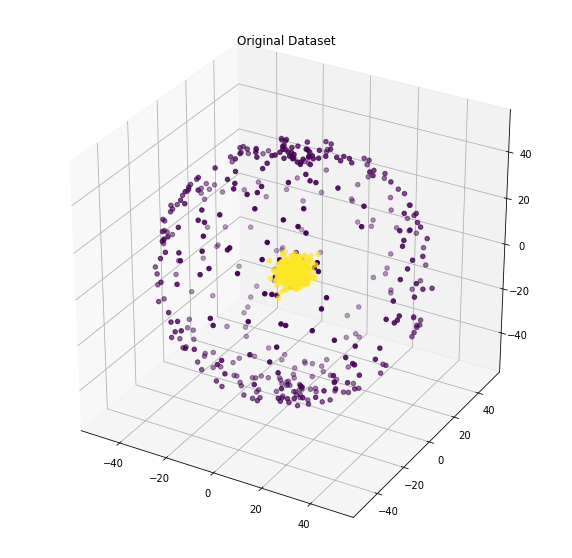

In [158]:
# Plotting the original Dataframe.

plot_df(df5,"Original Dataset")

In [165]:
# K-Means Clustering.

mdl_data5=KMeans(n_clusters=number_of_clusters)
mdl_data5.fit(df_kmeans)
predicted_labels=mdl_data5.labels_ +1
df_predicted=df5
df_predicted["Class"]=predicted_labels
print('SSE_MDL5: '+ str(mdl_data5.inertia_))

SSE_MDL5: 754101.0996201246


In [166]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2,

In [167]:
#printing the post K-means clustering dataframe
df_predicted

X1         X2         X3  Class
0    -4.822490 -50.402170   4.020861      1
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      2
4     4.425242  -4.666664  50.223740      2
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      1
796   0.500754  -1.848209   0.605654      1
797   1.089574  -0.246493  -3.355758      1
798  -1.907717   4.964502   2.098423      1
799   3.415463   4.529521  -1.617736      1

[800 rows x 4 columns]

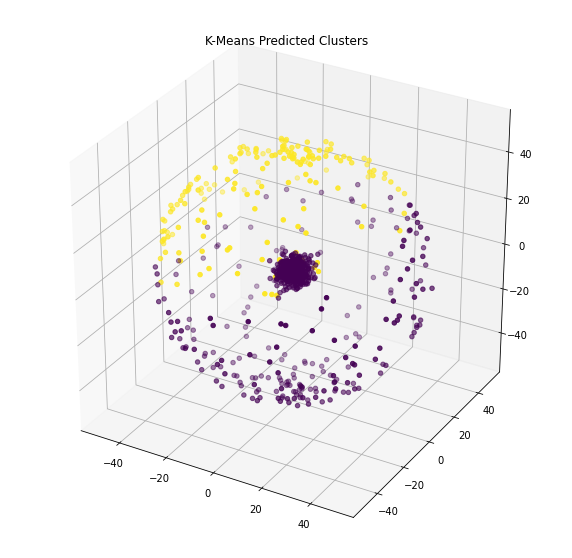

In [168]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [169]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[229, 171],
       [400,   0]])

In [170]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.28625

In [171]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.22254616132167152

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [172]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [173]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [174]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1         X2         X3  Class
0    -4.822490 -50.402170   4.020861      2
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      1
4     4.425242  -4.666664  50.223740      1
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      1
796   0.500754  -1.848209   0.605654      1
797   1.089574  -0.246493  -3.355758      1
798  -1.907717   4.964502   2.098423      1
799   3.415463   4.529521  -1.617736      1

[800 rows x 4 columns]

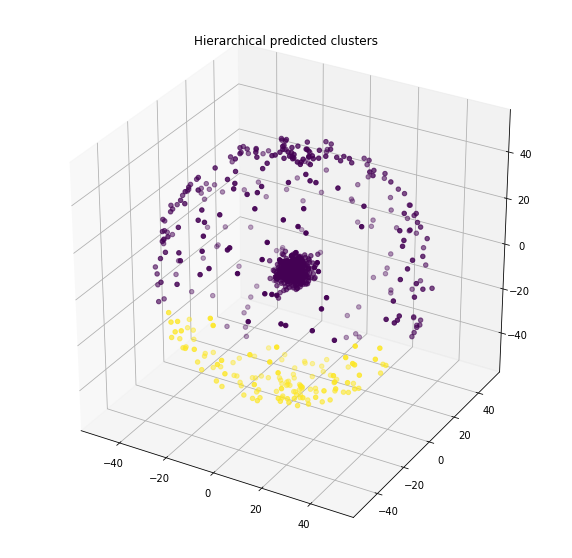

In [175]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

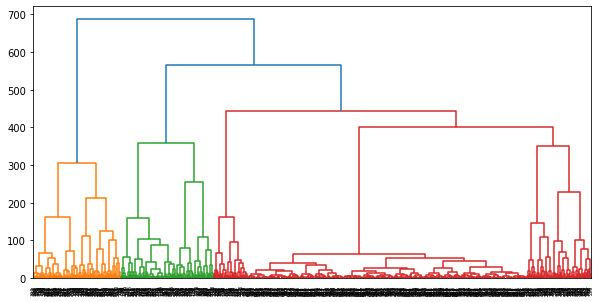

In [176]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [177]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[274, 126],
       [400,   0]])

In [178]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.3425

In [179]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.25512104283054005

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 6

In [180]:
#printing the required dataset (dataset_6 in this case)
df_6=datasets[5]
df_6

Unnamed: 0        X1        X2  Class
0              1  1.388261  2.076096      1
1              2  2.177247  3.102304      1
2              3  0.378645  5.307610      1
3              4  3.681732  1.622681      1
4              5  2.462861  2.777897      1
...          ...       ...       ...    ...
4091        4092  0.909687  0.375763      2
4092        4093  2.698381  0.511262      2
4093        4094  1.078797  1.526153      2
4094        4095  1.974889 -0.649343      2
4095        4096 -0.127192 -0.763974      2

[4096 rows x 4 columns]

In [181]:
#printing the original clusters class as given in the dataset
original_labels=df_6.iloc[:,-1].values
original_labels

array([1, 1, 1, ..., 2, 2, 2])

In [182]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_6[['Class']].nunique())
number_of_clusters

2

In [183]:
#removing the unnamed colomn from the dataset
df6=df_6.iloc[:,1:]
df6

X1        X2  Class
0     1.388261  2.076096      1
1     2.177247  3.102304      1
2     0.378645  5.307610      1
3     3.681732  1.622681      1
4     2.462861  2.777897      1
...        ...       ...    ...
4091  0.909687  0.375763      2
4092  2.698381  0.511262      2
4093  1.078797  1.526153      2
4094  1.974889 -0.649343      2
4095 -0.127192 -0.763974      2

[4096 rows x 3 columns]

In [184]:
#renaming the coloumns if required and removing the class coloumn
if len(df6.columns)==4:
  df6= df6.rename(columns={df6.columns[0]: 'X1', df6.columns[1]: 'X2',df6.columns[2]:'X3'})
  df_kmeans=df6.iloc[:,0:3]
else:
  df6=df6.rename(columns={df6.columns[0]: 'X1', df6.columns[1]: 'X2'})
  df_kmeans=df6.iloc[:,0:2]
df_kmeans

X1        X2
0     1.388261  2.076096
1     2.177247  3.102304
2     0.378645  5.307610
3     3.681732  1.622681
4     2.462861  2.777897
...        ...       ...
4091  0.909687  0.375763
4092  2.698381  0.511262
4093  1.078797  1.526153
4094  1.974889 -0.649343
4095 -0.127192 -0.763974

[4096 rows x 2 columns]

In [185]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)

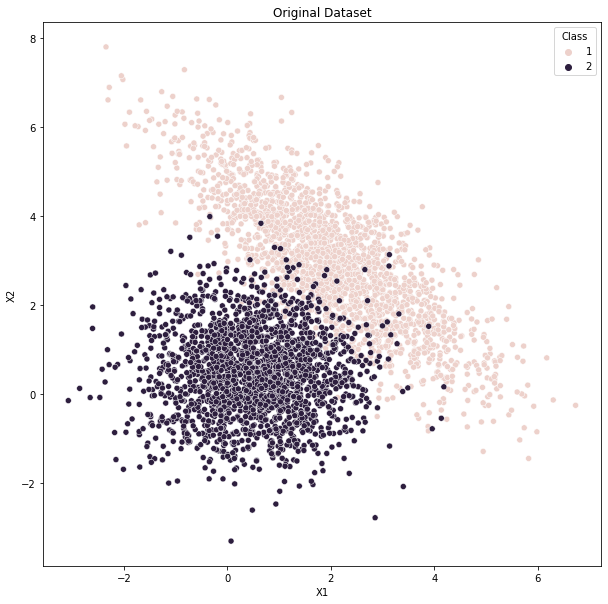

In [186]:
# Plotting the original Dataframe.

plot_df(df6,"Original Dataset")

In [187]:
# K-Means Clustering.

mdl_data6=KMeans(n_clusters=number_of_clusters)
mdl_data6.fit(df_kmeans)
predicted_labels=mdl_data6.labels_ +1
df_predicted=df6
df_predicted["Class"]=predicted_labels
print('SSE_MDL6: '+ str(mdl_data6.inertia_))

SSE_MDL6: 11774.999232261518


In [188]:
#Printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [189]:
#Printing the post K-means clustering dataframe
df_predicted

X1        X2  Class
0     1.388261  2.076096      1
1     2.177247  3.102304      1
2     0.378645  5.307610      1
3     3.681732  1.622681      1
4     2.462861  2.777897      1
...        ...       ...    ...
4091  0.909687  0.375763      2
4092  2.698381  0.511262      2
4093  1.078797  1.526153      2
4094  1.974889 -0.649343      2
4095 -0.127192 -0.763974      2

[4096 rows x 3 columns]

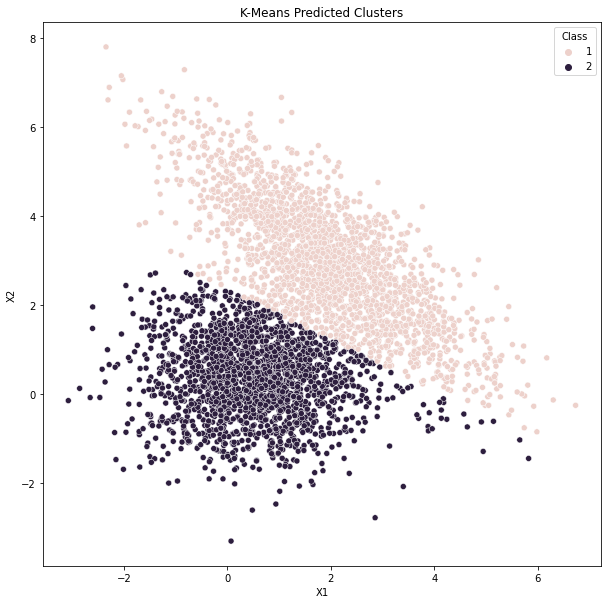

In [190]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [191]:
#Getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[2002,   46],
       [ 153, 1895]])

In [192]:
#Calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.951416015625

In [193]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.9513828386139447

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [194]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [195]:
#Printing the predicted clusters class after using Hierarchical clustering
hc_labels

array([1, 1, 1, ..., 2, 2, 2])

In [196]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2  Class
0     1.388261  2.076096      1
1     2.177247  3.102304      1
2     0.378645  5.307610      1
3     3.681732  1.622681      1
4     2.462861  2.777897      1
...        ...       ...    ...
4091  0.909687  0.375763      2
4092  2.698381  0.511262      1
4093  1.078797  1.526153      2
4094  1.974889 -0.649343      2
4095 -0.127192 -0.763974      2

[4096 rows x 3 columns]

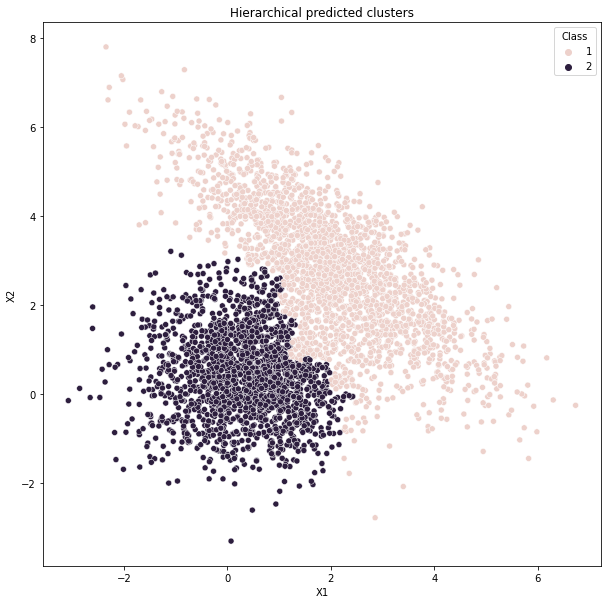

In [197]:
# Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

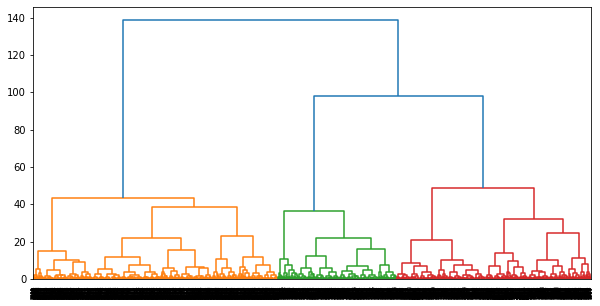

In [201]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))

In [198]:
#Getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[2016,   32],
       [ 280, 1768]])

In [199]:
#Calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.923828125

In [200]:
#Calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.9235478572495148

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 7

In [202]:
#printing the required dataset (dataset_7 in this case)
df_7=datasets[6]
df_7

Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

In [203]:
#printing the original clusters class as given in the dataset
original_labels=df_7.iloc[:,-1].values
original_labels

array([5, 4, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [204]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_7[['Class']].nunique())
number_of_clusters

6

In [205]:
#removing the unnamed colomn from the dataset
df7=df_7.iloc[:,1:]
df7

X1        X2  Class
0   -3.000000 -3.000000      5
1   -3.000000  3.000000      4
2    3.000000 -3.000000      6
3    3.000000  3.000000      3
4   -0.417091  0.114782      1
..        ...       ...    ...
765 -1.604434 -1.118861      2
766 -3.050000 -3.050000      5
767 -3.050000  2.950000      4
768  2.950000 -3.050000      6
769  2.950000  2.950000      3

[770 rows x 3 columns]

In [206]:
#renaming the coloumns if required and removing the class coloumn
if len(df7.columns)==4:
  df7= df7.rename(columns={df7.columns[0]: 'X1', df7.columns[1]: 'X2',df7.columns[2]:'X3'})
  df_kmeans=df7.iloc[:,0:3]
else:
  df7=df7.rename(columns={df7.columns[0]: 'X1', df7.columns[1]: 'X2'})
  df_kmeans=df7.iloc[:,0:2]
df_kmeans

X1        X2
0   -3.000000 -3.000000
1   -3.000000  3.000000
2    3.000000 -3.000000
3    3.000000  3.000000
4   -0.417091  0.114782
..        ...       ...
765 -1.604434 -1.118861
766 -3.050000 -3.050000
767 -3.050000  2.950000
768  2.950000 -3.050000
769  2.950000  2.950000

[770 rows x 2 columns]

In [207]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)

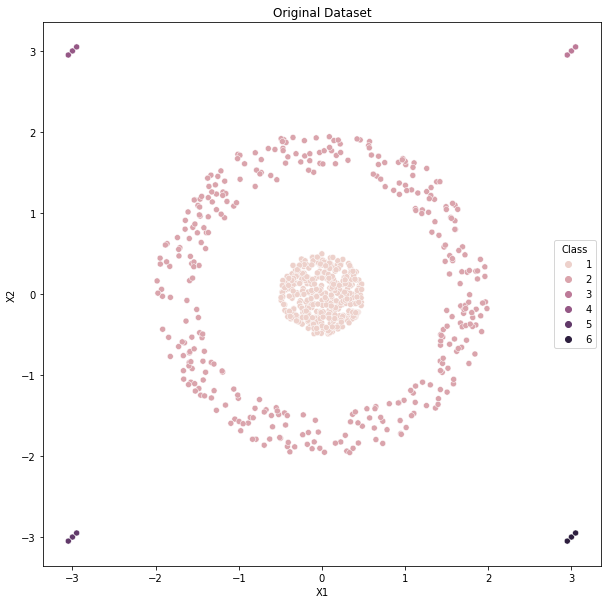

In [208]:
# Plotting the original Dataframe.

plot_df(df7,"Original Dataset")

In [214]:
#K-Means Clustering.
mdl_data7=KMeans(n_clusters=number_of_clusters)
mdl_data7.fit(df_kmeans)
predicted_labels=mdl_data7.labels_ +1
df_predicted=df7
df_predicted["Class"]=predicted_labels
print('SSE_MDL7: '+ str(mdl_data7.inertia_))

SSE_MDL7: 274.54882226776175


In [215]:
#Printing the predicted clusters class after using K-means clustering
predicted_labels

array([2, 4, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [216]:
#Printing the post K-means clustering dataframe
df_predicted

X1        X2  Class
0   -3.000000 -3.000000      2
1   -3.000000  3.000000      4
2    3.000000 -3.000000      6
3    3.000000  3.000000      5
4   -0.417091  0.114782      1
..        ...       ...    ...
765 -1.604434 -1.118861      2
766 -3.050000 -3.050000      2
767 -3.050000  2.950000      4
768  2.950000 -3.050000      6
769  2.950000  2.950000      5

[770 rows x 3 columns]

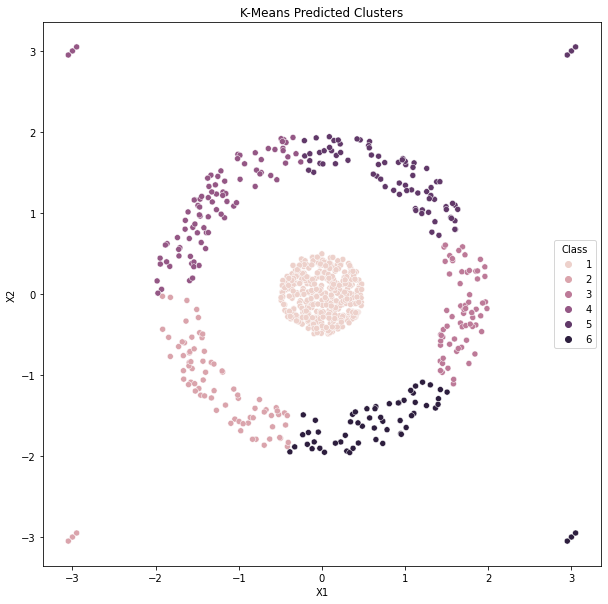

In [217]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [218]:
#Getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[395,   0,   0,   0,   0,   0],
       [  0,  77,  68,  87,  75,  56],
       [  0,   0,   0,   0,   3,   0],
       [  0,   0,   0,   3,   0,   0],
       [  0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3]])

In [219]:
#Calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

0.6207792207792208

In [220]:
#Calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

0.6774980353513813

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [221]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [222]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_labels

array([3, 4, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [223]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2  Class
0   -3.000000 -3.000000      3
1   -3.000000  3.000000      4
2    3.000000 -3.000000      1
3    3.000000  3.000000      2
4   -0.417091  0.114782      5
..        ...       ...    ...
765 -1.604434 -1.118861      3
766 -3.050000 -3.050000      3
767 -3.050000  2.950000      4
768  2.950000 -3.050000      1
769  2.950000  2.950000      2

[770 rows x 3 columns]

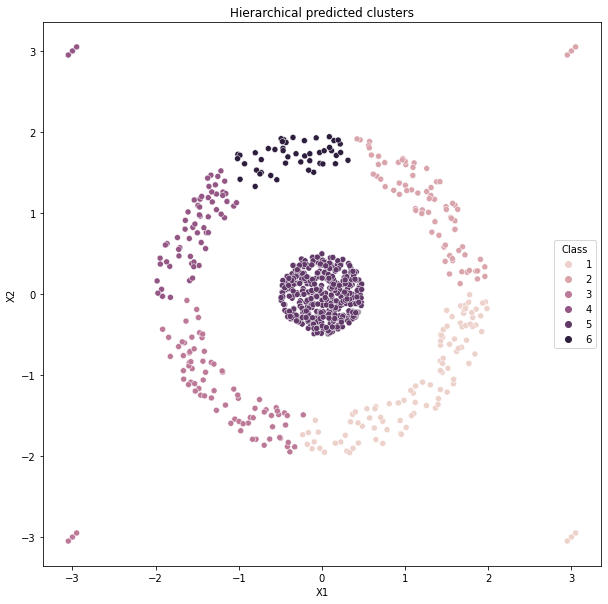

In [224]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

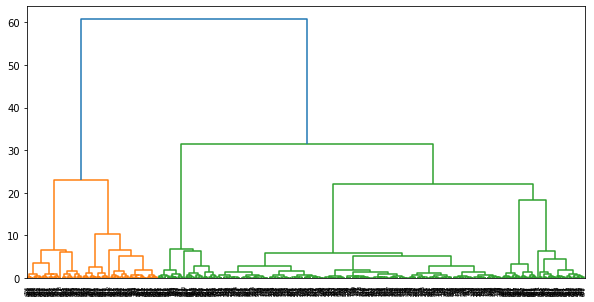

In [ ]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))

In [225]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[  0,   0,   0,   0, 395,   0],
       [101,  74,  78,  63,   0,  47],
       [  0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0],
       [  0,   0,   3,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0]])

In [226]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

0.1

In [227]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

0.15891022021456808

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

DATA 8

In [228]:
#printing the required dataset (dataset_8 in this case)
df_8=datasets[7]
df_8

Unnamed: 0        X1        X2       X3  Class
0              1  0.000000  0.000000  1.00000      1
1              2  0.000000  0.052336  0.99863      1
2              3  0.049774  0.016173  0.99863      1
3              4  0.030762 -0.042341  0.99863      1
4              5 -0.030762 -0.042341  0.99863      1
...          ...       ...       ...      ...    ...
3997        3998  0.049774 -0.016173 -0.99863      1
3998        3999  0.000000 -0.052336 -0.99863      1
3999        4000 -0.049774 -0.016173 -0.99863      1
4000        4001 -0.030762  0.042341 -0.99863      1
4001        4002  0.000000  0.000000 -1.00000      1

[4002 rows x 5 columns]

In [229]:
#printing the original clusters class as given in the dataset
original_labels=df_8.iloc[:,-1].values
original_labels

array([1, 1, 1, ..., 1, 1, 1])

In [230]:
#getting the number of unique clusters in the given dataset
number_of_clusters=int(df_8[['Class']].nunique())
number_of_clusters

1

In [231]:
#removing the unnamed colomn from the dataset
df8=df_8.iloc[:,1:]
df8

X1        X2       X3  Class
0     0.000000  0.000000  1.00000      1
1     0.000000  0.052336  0.99863      1
2     0.049774  0.016173  0.99863      1
3     0.030762 -0.042341  0.99863      1
4    -0.030762 -0.042341  0.99863      1
...        ...       ...      ...    ...
3997  0.049774 -0.016173 -0.99863      1
3998  0.000000 -0.052336 -0.99863      1
3999 -0.049774 -0.016173 -0.99863      1
4000 -0.030762  0.042341 -0.99863      1
4001  0.000000  0.000000 -1.00000      1

[4002 rows x 4 columns]

In [232]:
#renaming the coloumns if required and removing the class coloumn
if len(df8.columns)==4:
  df8= df8.rename(columns={df8.columns[0]: 'X1', df8.columns[1]: 'X2',df8.columns[2]:'X3'})
  df_kmeans=df8.iloc[:,0:3]
else:
  df8=df8.rename(columns={df8.columns[0]: 'X1', df8.columns[1]: 'X2'})
  df_kmeans=df8.iloc[:,0:2]
df_kmeans

X1        X2       X3
0     0.000000  0.000000  1.00000
1     0.000000  0.052336  0.99863
2     0.049774  0.016173  0.99863
3     0.030762 -0.042341  0.99863
4    -0.030762 -0.042341  0.99863
...        ...       ...      ...
3997  0.049774 -0.016173 -0.99863
3998  0.000000 -0.052336 -0.99863
3999 -0.049774 -0.016173 -0.99863
4000 -0.030762  0.042341 -0.99863
4001  0.000000  0.000000 -1.00000

[4002 rows x 3 columns]

In [233]:
#creating a plot function for scatterplot
def plot_df(df,tit):
  if len(df.columns)==4:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_title(tit)
    ax.scatter3D(df['X1'].values, df['X2'].values, df['X3'].values, c=df[df.columns[-1]].values)
  else:
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x='X1', y='X2', data=df, hue=df.columns[-1]).set(title=tit)

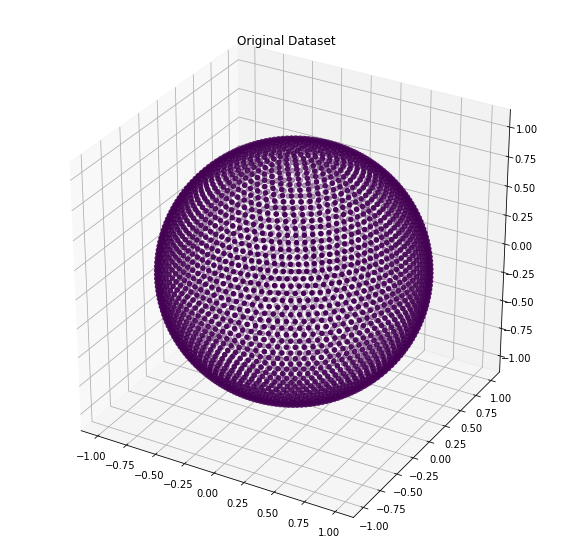

In [234]:
# Plotting the original Dataframe.

plot_df(df8,"Original Dataset")

In [235]:
# K-Means Clustering.

mdl_data8=KMeans(n_clusters=number_of_clusters)
mdl_data8.fit(df_kmeans)
predicted_labels=mdl_data8.labels_ +1
df_predicted=df8
df_predicted["Class"]=predicted_labels
print('SSE_MDL8: '+ str(mdl_data8.inertia_))

SSE_MDL8: 4002.0002739281686


In [236]:
#printing the predicted clusters class after using K-means clustering
predicted_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [237]:
#printing the post K-means clustering dataframe
df_predicted

X1        X2       X3  Class
0     0.000000  0.000000  1.00000      1
1     0.000000  0.052336  0.99863      1
2     0.049774  0.016173  0.99863      1
3     0.030762 -0.042341  0.99863      1
4    -0.030762 -0.042341  0.99863      1
...        ...       ...      ...    ...
3997  0.049774 -0.016173 -0.99863      1
3998  0.000000 -0.052336 -0.99863      1
3999 -0.049774 -0.016173 -0.99863      1
4000 -0.030762  0.042341 -0.99863      1
4001  0.000000  0.000000 -1.00000      1

[4002 rows x 4 columns]

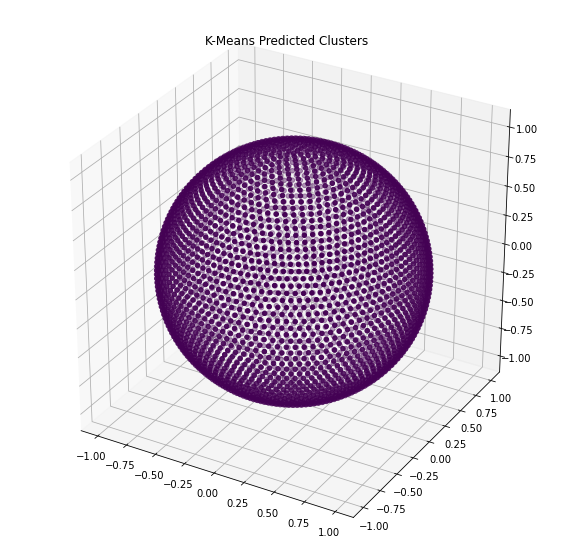

In [238]:
# Plotting dataframe of clusters predicted by K-Means clustering

plot_df(df_predicted, "K-Means Predicted Clusters")

In [239]:
#getting the contingency matrix
cont_index=metrics.cluster.contingency_matrix(original_labels,predicted_labels)
cont_index

array([[4002]])

In [240]:
#calculating the accuracy
accuracy=metrics.accuracy_score(original_labels,predicted_labels)
accuracy

1.0

In [241]:
#calculating f1 score(external validation)
f1_sc=metrics.f1_score(original_labels,predicted_labels,average='weighted')
f1_sc

1.0

The Accuracy and F1_Score[External validation] reported here for K-means clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!

In [242]:
# Hierarchical Clustering
df_hier=df_kmeans
hc = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
hc_labels=hc.fit_predict(df_hier)+1

In [243]:
#printing the predicted clusters class after using Hierarchical clustering 
hc_labels

array([1, 1, 1, ..., 1, 1, 1])

In [244]:
#printing the post Hierarchical clustering dataframe
hc_pred_df=df_hier
hc_pred_df["Class"]=hc_labels
hc_pred_df

X1        X2       X3  Class
0     0.000000  0.000000  1.00000      1
1     0.000000  0.052336  0.99863      1
2     0.049774  0.016173  0.99863      1
3     0.030762 -0.042341  0.99863      1
4    -0.030762 -0.042341  0.99863      1
...        ...       ...      ...    ...
3997  0.049774 -0.016173 -0.99863      1
3998  0.000000 -0.052336 -0.99863      1
3999 -0.049774 -0.016173 -0.99863      1
4000 -0.030762  0.042341 -0.99863      1
4001  0.000000  0.000000 -1.00000      1

[4002 rows x 4 columns]

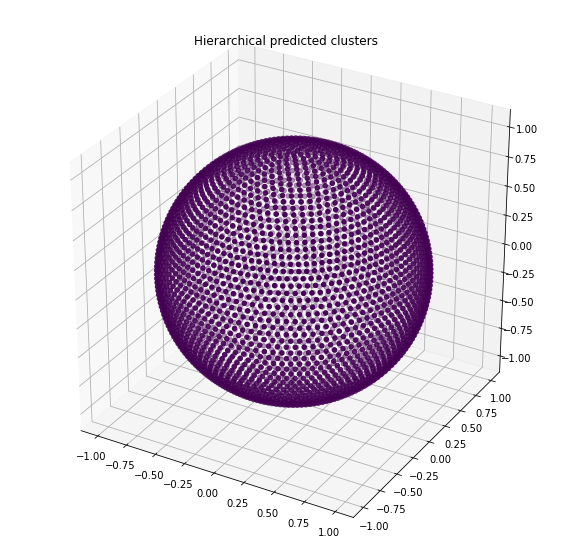

In [245]:
#Plotting dataframe of clusters predicted by Hierarchical clustering

plot_df(hc_pred_df,"Hierarchical predicted clusters")

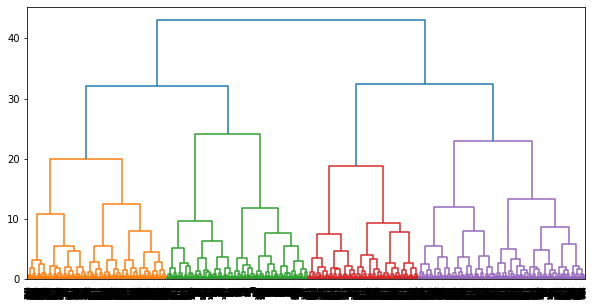

In [ ]:
#Dendogram representation of Hierarchical clustering
fig=plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))


In [246]:
#getting the contingency matrix
cont_index1=metrics.cluster.contingency_matrix(original_labels,hc_labels)
cont_index1

array([[4002]])

In [247]:
#calculating the accuracy
accuracy1=metrics.accuracy_score(original_labels,hc_labels)
accuracy1

1.0

In [248]:
#calculating f1 score(external validation)
f1_sc1=metrics.f1_score(original_labels,hc_labels,average='weighted')
f1_sc1

1.0

The Accuracy and F1_Score[External validation] reported here for Hierarchical clustering cannot be accurately calculated as we cant correctly map the original label names to our predicted label names.
## We have very low confidence on our metrics reported above!!